<a href="https://colab.research.google.com/github/JUudhhayKiirran/NIRF/blob/main/Multiple_Linear_Regression_All_2022_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

> A tutorial on How to use Multiple Linear Regression.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter, Regression]

## 0.Data Preprocessing

### 0.1 Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 0.2 Importing the dataset

In [ ]:
dataset = pd.read_excel('/content/2020_2021_2022_Combined.xlsx')
dataset

,Name of the college,Rank,Score,Total student sanctioned,Total students enrolled,Secured_SS,Full time regular faculty,others,Adhoc Faculty,Secured_FSR,...,Number of Women,percentage_1,Secured_WD,Economically and Socially Challenged Students,students being provided full tuition fee rembursement,Secured_ECS,Facilities for Physically Challenged Students,Secured_PCS,Total_OI,Secured_PR
0,Miranda House,1,78.00,4000,4519,18.00,131,60,69,26.65,...,4519,100.000000,30.00,2372.0,220,1.69,80,20,77.07,81.58
1,Lady Shri Ram College for Women,2,69.44,3324,3324,14.00,95,0,67,26.81,...,3324,100.000000,30.00,1389.0,141,2.13,80,20,75.30,94.42
2,St. Xavier's College,4,67.41,7715,8011,18.00,372,2,1,27.19,...,3778,47.160155,29.15,5015.0,857,2.48,80,20,55.48,80.66
3,PSGR Krishnammal College for Women,6,67.14,7980,7341,16.56,371,0,55,30.00,...,7341,100.000000,30.00,6997.0,1217,7.85,80,20,61.09,50.71
4,St. Stephen's College,8,66.71,1380,1388,10.00,58,0,35,30.00,...,722,52.017291,30.00,267.0,43,1.23,60,14,64.05,95.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,"Government Institute of Science, Nagpur",61,53.93,1090,1024,9.39,57,2,0,30.00,...,733,71.582031,30.00,669.0,275,3.86,60,16,49.86,12.46
114,N. G. M. College,72,52.61,6052,5613,16.69,291,0,3,28.45,...,3469,61.802957,30.00,5613.0,3752,2.71,80,20,53.06,13.42
115,"Farook College, Kozhikkode",73,52.49,3003,3253,14.00,115,1,55,27.85,...,2407,73.993237,30.00,3195.0,1354,5.17,80,20,55.52,6.13
116,Mar Thoma College,80,52.01,1870,1699,9.09,68,0,26,28.88,...,1189,69.982343,30.00,1199.0,0,5.70,80,20,55.95,2.56


### 0.3 Check if any null value

In [ ]:
dataset.isna().sum()

Name of the college                                      0
Rank                                                     0
Score                                                    0
Total student sanctioned                                 0
Total students enrolled                                  0
Secured_SS                                               0
Full time regular faculty                                0
others                                                   0
Adhoc Faculty                                            0
Secured_FSR                                              0
Experience up to 8 years                                 0
Experience from 8 to 15 years                            0
Experience  >= 15 years                                  0
Faculty with PHD,Net and SET                             0
Secured_FQE                                              0
Annual Capital Expenditure per student                   0
Average Captial                                         

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 46 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Name of the college                                    118 non-null    object 
 1   Rank                                                   118 non-null    int64  
 2   Score                                                  118 non-null    float64
 3   Total student sanctioned                               118 non-null    int64  
 4   Total students enrolled                                118 non-null    int64  
 5   Secured_SS                                             118 non-null    float64
 6   Full time regular faculty                              118 non-null    int64  
 7   others                                                 118 non-null    int64  
 8   Adhoc Faculty                                     

In [ ]:
### 0.4 Split into X & y

<ipython-input-8-e92ea1ed6695>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr(),


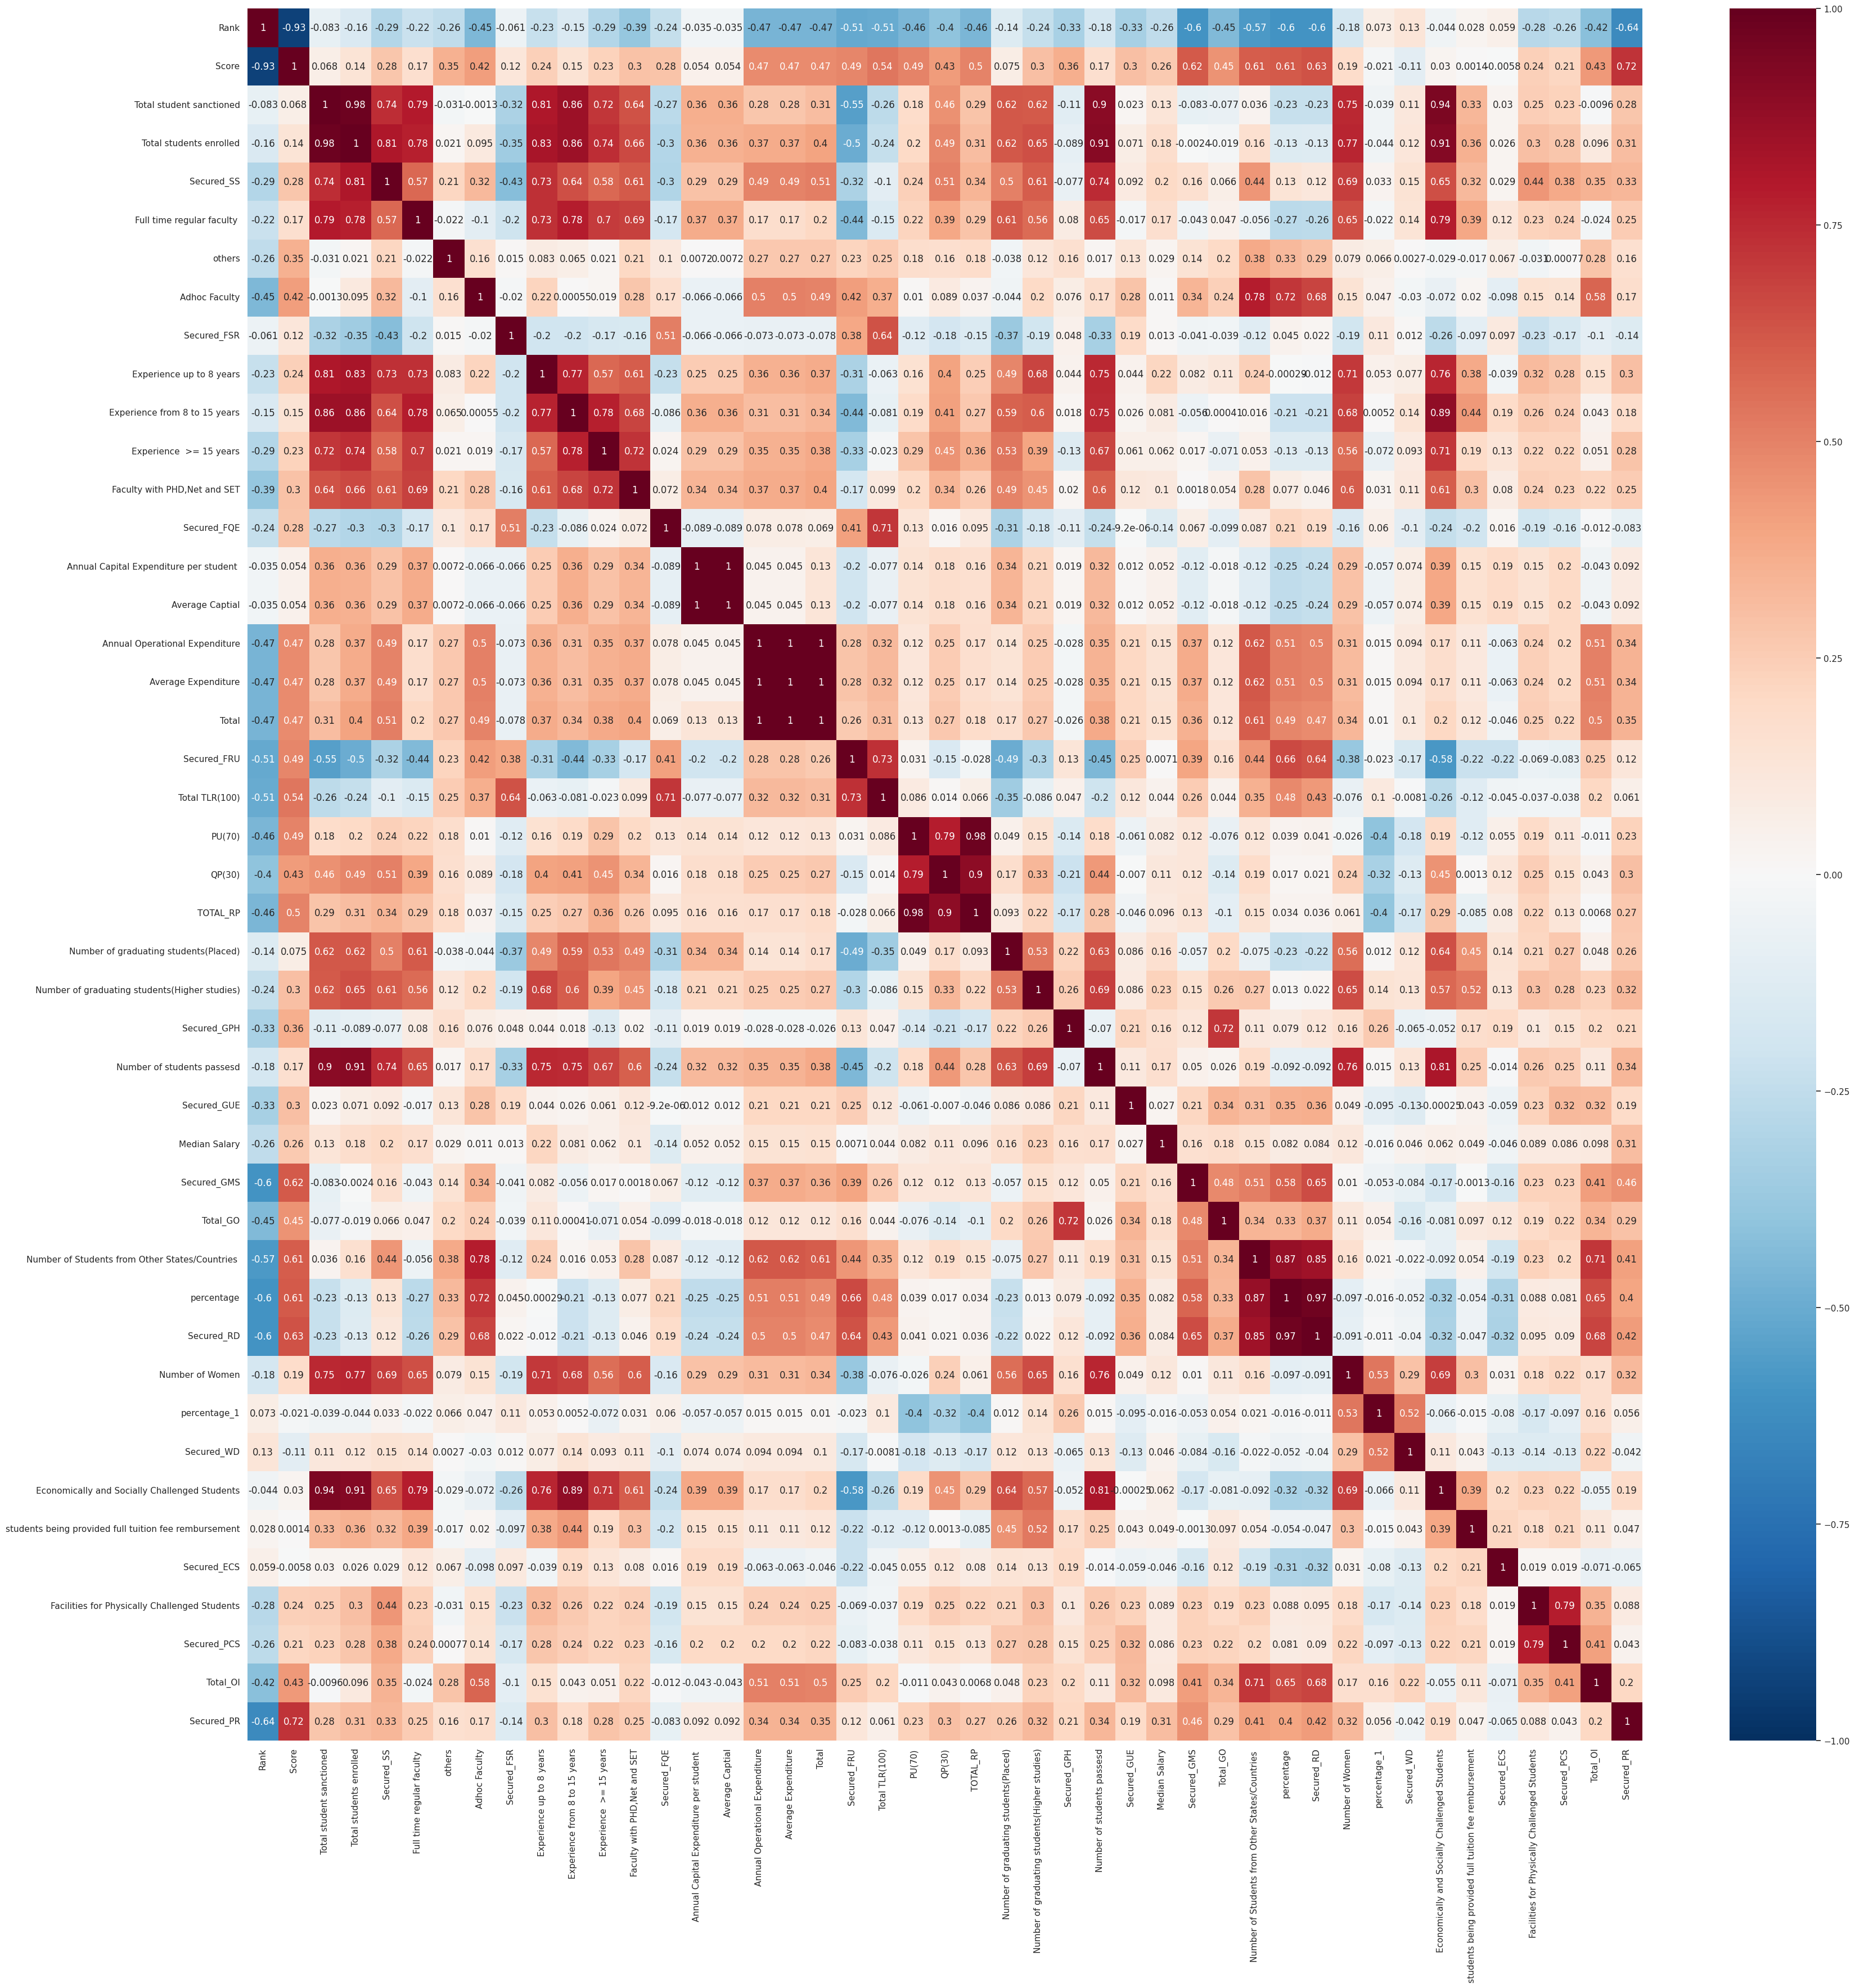

In [ ]:
import seaborn as sns
sns.set(font_scale=1)
plt.figure(figsize=(40,40))
sns.heatmap(
    dataset.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

In [ ]:
X =pd.DataFrame(dataset.drop(['Name of the college','Rank','Score'], axis=1))
X

,Total student sanctioned,Total students enrolled,Secured_SS,Full time regular faculty,others,Adhoc Faculty,Secured_FSR,Experience up to 8 years,Experience from 8 to 15 years,Experience >= 15 years,...,Number of Women,percentage_1,Secured_WD,Economically and Socially Challenged Students,students being provided full tuition fee rembursement,Secured_ECS,Facilities for Physically Challenged Students,Secured_PCS,Total_OI,Secured_PR
0,4000,4519,18.00,131,60,69,26.65,144,69,41,...,4519,100.000000,30.00,2372.0,220,1.69,80,20,77.07,81.58
1,3324,3324,14.00,95,0,67,26.81,76,45,41,...,3324,100.000000,30.00,1389.0,141,2.13,80,20,75.30,94.42
2,7715,8011,18.00,372,2,1,27.19,193,93,82,...,3778,47.160155,29.15,5015.0,857,2.48,80,20,55.48,80.66
3,7980,7341,16.56,371,0,55,30.00,152,140,130,...,7341,100.000000,30.00,6997.0,1217,7.85,80,20,61.09,50.71
4,1380,1388,10.00,58,0,35,30.00,32,18,42,...,722,52.017291,30.00,267.0,43,1.23,60,14,64.05,95.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1090,1024,9.39,57,2,0,30.00,8,8,43,...,733,71.582031,30.00,669.0,275,3.86,60,16,49.86,12.46
114,6052,5613,16.69,291,0,3,28.45,121,102,71,...,3469,61.802957,30.00,5613.0,3752,2.71,80,20,53.06,13.42
115,3003,3253,14.00,115,1,55,27.85,107,42,22,...,2407,73.993237,30.00,3195.0,1354,5.17,80,20,55.52,6.13
116,1870,1699,9.09,68,0,26,28.88,50,24,20,...,1189,69.982343,30.00,1199.0,0,5.70,80,20,55.95,2.56


In [ ]:
y = dataset['Score']
y

0      78.00
1      69.44
2      67.41
3      67.14
4      66.71
       ...  
113    53.93
114    52.61
115    52.49
116    52.01
117    51.34
Name: Score, Length: 118, dtype: float64

### 0.6 Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2509)

## 1. Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## 2. Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
d = {'y_pred': y_pred, 'y_test': y_test}

In [ ]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


2.0224038521327734


In [ ]:
from sklearn.metrics  import mean_absolute_percentage_error
mae = metrics.mean_absolute_error(y_test, y_pred)  
mse = metrics.mean_squared_error(y_test, y_pred)   
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)
print(mape)

0.96560844951245
4.090117341090671
2.0224038521251564
0.9046593030058533
0.015185697804300116


### 2.1 Compare Predicted results

In [ ]:
pd.DataFrame(d)

,y_pred,y_test
43,69.024973,69.54
45,68.457077,68.30
80,53.227530,53.03
28,52.141335,52.27
114,52.404887,52.61
115,52.134069,52.49
59,62.512826,59.50
37,50.467318,50.37
17,54.259149,54.27
94,57.905112,58.35


#Bagging

In [ ]:

from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
#Bagging
bag_model = BaggingRegressor(
base_estimator=BaggingRegressor(), 
n_estimators=1000, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)
l=bag_model.fit(X_train, y_train)
mae = metrics.mean_absolute_error(y_test, l.predict(X_test))
print("The mean abs error (MAE) on test set: {:.4f}".format(mae))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The mean abs error (MAE) on test set: 2.6324


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,l.predict(X_test ))))

3.1307810017386433


In [ ]:
mae = metrics.mean_absolute_error(y_test,l.predict(X_test ))  
mse = metrics.mean_squared_error(y_test, l.predict(X_test ))   
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,l.predict(X_test ))
mape = mean_absolute_percentage_error(y_test,l.predict(X_test ))

In [ ]:
print(mae)
print(mse)
print(rmse)
print(r2)
print(mape)

2.6323670833333463
9.801789680847621
3.1307810017386433
0.7715201345023391
0.04462823881089072


#Boosting

In [ ]:
#Adaptive Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
adaclf = AdaBoostRegressor( 
                           n_estimators=1000,
                           learning_rate=0.1,
                           random_state=0)
    
adaclf.fit(X_train, y_train)
y_pred_1 = adaclf.predict(X_test)
ab=mean_absolute_error(y_test, y_pred_1)
print(ab)

1.9101316760343432


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))

2.372635248135487


In [ ]:
mae = metrics.mean_absolute_error(y_test,y_pred_1)  
mse = metrics.mean_squared_error(y_test, y_pred_1)   
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred_1)
mape = mean_absolute_percentage_error(y_test, y_pred_1)

print(mae)
print(mse)
print(rmse)
print(r2)
print(mape)

1.9101316760343432
5.629398020694945
2.372635248135487
0.8687786471164158
0.03225014200683263


In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
regressor = GradientBoostingRegressor(
    max_depth=3,
    n_estimators=1000,
    learning_rate=0.1,
    random_state=42
)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
gb=mean_absolute_error(y_test, y_pred)
print(gb)

1.7145242489710553


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

2.2073129345451044


In [ ]:
mae = metrics.mean_absolute_error(y_test,y_pred)  
mse = metrics.mean_squared_error(y_test, y_pred)   
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)
print(mape)

1.7145242489710553
4.87223039101012
2.2073129345451044
0.8864282359999238
0.029384369260016734


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
d = {'y_pred': y_pred, 'y_test': y_test}
l=pd.DataFrame(d)
l

,y_pred,y_test
43,67.345759,69.54
45,67.897097,68.30
80,53.135834,53.03
28,55.950972,52.27
114,52.650154,52.61
115,52.332924,52.49
59,58.951870,59.50
37,51.790166,50.37
17,58.428593,54.27
94,59.447742,58.35


In [ ]:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor 
#Extreme Gradient Boosting
clf = XGBRegressor(n_estimators=1000,
                   learning_rate=0.1,
                   max_depth=3,
                   random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
eg=mean_absolute_error(y_test, y_pred)
print(eg)

1.4537727673848473


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.7600355926169398


In [ ]:
mae = metrics.mean_absolute_error(y_test,y_pred)  
mse = metrics.mean_squared_error(y_test, y_pred)   
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)
print(mape)

1.4537727673848473
3.0977252872784624
1.7600355926169398
0.9277919767683812
0.025557088734805913


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model=RandomForestRegressor(n_estimators=100)
c=model.fit(X_train,y_train)
y_pred=c.predict(X_test)
lk=mean_absolute_error(y_test, y_pred)
print(lk)

2.079766666666658


In [ ]:
mae = metrics.mean_absolute_error(y_test,y_pred)  
mse = metrics.mean_squared_error(y_test, y_pred)   
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)
print(mape)

2.079766666666658
6.900260812499961
2.6268347516545383
0.8391548162455129
0.035814401472270156


##MLP

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

2.12.0


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# create an MLP regression model with two hidden layers of 50 neurons each
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# fit the model to the training data
mlp.fit(X_train, y_train)

# make predictions on the testing data
y_pred = mlp.predict(X_test)

# evaluate the performance of the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared score: {:.2f}".format(r2))
print("Mape: {:.2f}".format(mape))

Mean Absolute Error: 40762724.94
Mean Squared Error: 2699539626576240.50
Root Mean Squared Error: 51957094.09
R-squared score: -62926309466823.58
Mape: 678153.02


##CNN

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# normalize the data
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# reshape the data to have a 3D structure (samples, time steps, features)
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# create a CNN regression model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# compile the model
model.compile(loss='mse', optimizer='adam')

# fit the model to the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# make predictions on the testing data
y_pred = model.predict(X_test)

# evaluate the performance of the model using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared score: {:.2f}".format(r2))
print("mape: {:.2f}".format(r2))

1/1 [==============================] - 0s 124ms/step
Mean Absolute Error: 5.66
Mean Squared Error: 59.71
Root Mean Squared Error: 7.73
R-squared score: -0.39
mape: -0.39


##RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.metrics import RootMeanSquaredError, MeanAbsoluteError, MeanSquaredError, MeanAbsolutePercentageError

In [ ]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=[RootMeanSquaredError(), MeanAbsoluteError(), MeanSquaredError(), MeanAbsolutePercentageError()])

# Fit model to training data
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model on test data
results = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {:.4f}'.format(results[0]))
print('Test RMSE: {:.4f}'.format(results[1]))
print('Test MAE: {:.4f}'.format(results[2]))
print('Test MSE: {:.4f}'.format(results[3]))
print('Test MAPE: {:.4f}%'.format(results[4]))




Epoch 1/50
3/3 [==============================] - 2s 215ms/step - loss: 3456.0493 - root_mean_squared_error: 58.7882 - mean_absolute_error: 58.3874 - mean_squared_error: 3456.0493 - mean_absolute_percentage_error: 100.0657 - val_loss: 3504.6418 - val_root_mean_squared_error: 59.2000 - val_mean_absolute_error: 58.8426 - val_mean_squared_error: 3504.6418 - val_mean_absolute_percentage_error: 99.8889
Epoch 2/50
3/3 [==============================] - 0s 35ms/step - loss: 3438.5513 - root_mean_squared_error: 58.6392 - mean_absolute_error: 58.2338 - mean_squared_error: 3438.5513 - mean_absolute_percentage_error: 99.7929 - val_loss: 3484.6121 - val_root_mean_squared_error: 59.0306 - val_mean_absolute_error: 58.6697 - val_mean_squared_error: 3484.6121 - val_mean_absolute_percentage_error: 99.5880
Epoch 3/50
3/3 [==============================] - 0s 31ms/step - loss: 3412.7822 - root_mean_squared_error: 58.4190 - mean_absolute_error: 58.0049 - mean_squared_error: 3412.7822 - mean_absolute_perce

#Predictive model

In [ ]:

# make a single prediction with the model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# create the inputs and outputs
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2509)
# define model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# fit model
regressor.fit(X_train, y_train)
# define input

new_input = [[11365, 9755, 17.17, 442, 0, 0, 19.54, 228, 161, 74, 199, 10.29, 68916965, 22972321.67, 735861421, 245287140.3, 804778386, 8.1, 55.1, 22.01, 21.19, 43.2, 1349, 1940, 13.68, 6675, 34.97, 1584504, 10.95, 59.6, 123, 1.26089185, 0.38, 4764, 48.83649411, 27.58, 9507, 40, 1.66, 80, 20, 49.62, 55.06]]
# get prediction for new input
new_output = regressor.predict(new_input)
# summarize input and output
print(new_input, new_output)

[[11365, 9755, 17.17, 442, 0, 0, 19.54, 228, 161, 74, 199, 10.29, 68916965, 22972321.67, 735861421, 245287140.3, 804778386, 8.1, 55.1, 22.01, 21.19, 43.2, 1349, 1940, 13.68, 6675, 34.97, 1584504, 10.95, 59.6, 123, 1.26089185, 0.38, 4764, 48.83649411, 27.58, 9507, 40, 1.66, 80, 20, 49.62, 55.06]] [54.33689815]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
